# Linear Regression

Regresi linier adalah salah satu metode supervised yang masuk dalam golongan regression, sesuai namanya. Contoh paling terkenal dari regresi linier adalah memperkirakan harga rumah berdasarkan fitur yang terdapat pada rumah seperti luas rumah, jumlah kamar tidur, lokasi dan sebagainya. Ini adalah model paling sederhana yang perlu diketahui guna memahami metode machine learning lain yang lebih kompleks. Regresi linier cocok dipakai ketika terdapat hubungan linear pada data. Namun untuk implementasi pada kebanyakan kasus, ia kurang direkomendasikan. Sebabnya, regresi linier selalu mengasumsikan ada hubungan linier pada data, padahal tidak.  

Secara sederhana regresi linear adalah teknik untuk memprediksi sebuah nilai dari variable Y (variabel dependen) berdasarkan beberapa variabel tertentu X (variabel independen) jika terdapat hubungan linier antara X dan Y.

Hubungan antara hubungan linier dapat direpresentasikan dengan sebuah garis lurus (disebut garis regresi). Ilustrasi hubungan linier dapat dilihat pada gambar di mana data-data cenderung memiliki pola garis lurus.


# Example 1

House pricing with numpy arrays

In [9]:
import numpy as np
 
#buat data jumlah kamar
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])
 
#data harga rumah. asumsi dalam dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])

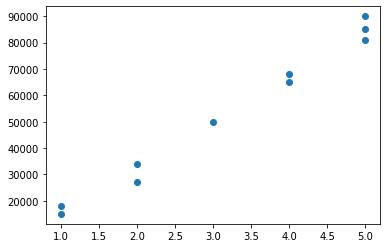

In [10]:
# menampilkan scatter plot dari dataset
import matplotlib.pyplot as plt
%matplotlib inline
 
plt.scatter(bedrooms, house_price)

In [11]:
from sklearn.linear_model import LinearRegression
 
# latih model dengan Linear Regression.fit()
bedrooms = bedrooms.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

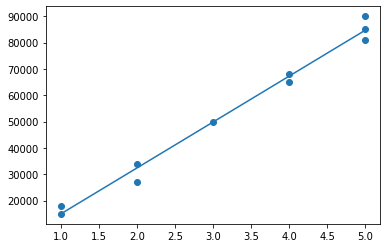

In [12]:
# menampilkan plot hubungan antara jumlah kamar dengan harga rumah
plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, linreg.predict(bedrooms))

# Example 2
Real Dataset

Car price predict

https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

In [14]:
import torch
import torchvision
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
import seaborn as sns
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split

In [20]:
from google.colab import files
uploaded = files.upload()

Saving car.csv to car.csv


In [22]:
import io
dataframe = pd.read_csv('/content/car.csv')
dataframe = dataframe.drop(['Car_Name', 'Kms_Driven'], axis=1) # Exclude columns that we won't use
dataframe

,Year,Selling_Price,Present_Price,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...
296,2016,9.50,11.60,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,Diesel,Dealer,Manual,0


In [23]:
num_rows = len(dataframe)
input_cols = ['Year',	'Selling_Price',	'Fuel_Type',	'Seller_Type',	'Transmission',	'Owner']
categorical_cols = ['Year', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
output_cols = ['Present_Price']

In [24]:
print('Minimun Charge: {}'.format(dataframe.Present_Price.min()))
print('Average Charge: {}'.format(dataframe.Present_Price.mean()))
print('Maximun Charge: {}'.format(dataframe.Present_Price.max()))

Minimun Charge: 0.32
Average Charge: 7.628471760797344
Maximun Charge: 92.6


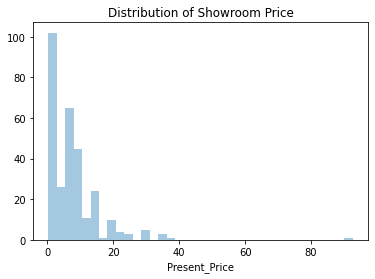

In [25]:
plt.title("Distribution of Showroom Price")
sns.distplot(dataframe.Present_Price, kde=False);

In [26]:
def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
    # Convert non-numeric categorical columns to numbers
    for col in categorical_cols:
        dataframe1[col] = dataframe1[col].astype('category').cat.codes
    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1[input_cols].to_numpy()
    targets_array = dataframe1[output_cols].to_numpy()
    return inputs_array, targets_array

In [27]:
inputs_array, targets_array = dataframe_to_arrays(dataframe) # Create arrays for inputs and targets
inputs_array, targets_array

(array([[11.  ,  3.35,  2.  ,  0.  ,  1.  ,  0.  ],
        [10.  ,  4.75,  1.  ,  0.  ,  1.  ,  0.  ],
        [14.  ,  7.25,  2.  ,  0.  ,  1.  ,  0.  ],
        ...,
        [ 6.  ,  3.35,  2.  ,  0.  ,  1.  ,  0.  ],
        [14.  , 11.5 ,  1.  ,  0.  ,  1.  ,  0.  ],
        [13.  ,  5.3 ,  2.  ,  0.  ,  1.  ,  0.  ]]), array([[ 5.59 ],
        [ 9.54 ],
        [ 9.85 ],
        [ 4.15 ],
        [ 6.87 ],
        [ 9.83 ],
        [ 8.12 ],
        [ 8.61 ],
        [ 8.89 ],
        [ 8.92 ],
        [ 3.6  ],
        [10.38 ],
        [ 9.94 ],
        [ 7.71 ],
        [ 7.21 ],
        [10.79 ],
        [10.79 ],
        [10.79 ],
        [ 5.09 ],
        [ 7.98 ],
        [ 3.95 ],
        [ 5.71 ],
        [ 8.01 ],
        [ 3.46 ],
        [ 4.41 ],
        [ 4.99 ],
        [ 5.87 ],
        [ 6.49 ],
        [ 3.95 ],
        [10.38 ],
        [ 5.98 ],
        [ 4.89 ],
        [ 7.49 ],
        [ 9.95 ],
        [ 8.06 ],
        [ 7.74 ],
        [ 7.2  ],
        

In [28]:
# Create PyTorch Tensors from Numpy arrays
inputs = torch.from_numpy(inputs_array).float()
targets = torch.from_numpy(targets_array).float()

In [30]:
dataset = TensorDataset(inputs, targets)
display(dataset)

In [31]:
val_percent = 0.1
val_size = int(num_rows * val_percent)
train_size = num_rows - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size]) # split dataset into 2 parts of the desired length

In [32]:
batch_size = 50
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [33]:
for xb, yb in train_loader:
    print("inputs:", xb)
    print("targets:", yb)
    break

inputs: tensor([[12.0000,  4.7500,  1.0000,  0.0000,  1.0000,  0.0000],
        [11.0000,  3.6500,  2.0000,  0.0000,  1.0000,  0.0000],
        [14.0000, 17.0000,  2.0000,  0.0000,  1.0000,  0.0000],
        [13.0000,  5.3000,  2.0000,  0.0000,  1.0000,  0.0000],
        [14.0000,  6.5000,  2.0000,  0.0000,  1.0000,  0.0000],
        [13.0000,  0.3000,  2.0000,  1.0000,  1.0000,  0.0000],
        [10.0000,  1.0000,  2.0000,  1.0000,  1.0000,  0.0000],
        [14.0000,  0.7500,  2.0000,  1.0000,  1.0000,  0.0000],
        [ 8.0000,  2.3500,  2.0000,  0.0000,  1.0000,  0.0000],
        [14.0000,  3.5000,  2.0000,  0.0000,  1.0000,  0.0000],
        [13.0000,  6.2500,  2.0000,  0.0000,  1.0000,  0.0000],
        [13.0000, 10.2500,  2.0000,  0.0000,  1.0000,  0.0000],
        [13.0000,  5.6500,  2.0000,  0.0000,  1.0000,  0.0000],
        [12.0000,  8.5000,  2.0000,  0.0000,  1.0000,  0.0000],
        [ 7.0000, 35.0000,  1.0000,  0.0000,  1.0000,  0.0000],
        [12.0000,  8.2500,  1.00

In [34]:
input_size = len(input_cols)
output_size = len(output_cols)

In [35]:
class PriceModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, xb):
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calculate loss
        loss = F.l1_loss(out, targets)
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss = F.l1_loss(out, targets)  
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 20 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

In [36]:
model = PriceModel()

In [37]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [38]:
result = evaluate(model, val_loader) # Use the evaluate function
print(result)

{'val_loss': 8.88991641998291}


In [46]:
epochs = 100
lr = 1e-2
history1 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 2.0884
Epoch [40], val_loss: 2.1264
Epoch [60], val_loss: 2.0501
Epoch [80], val_loss: 2.0334
Epoch [100], val_loss: 2.0984


In [47]:
epochs = 100
lr = 1e-3
history2 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 2.0474
Epoch [40], val_loss: 2.0437
Epoch [60], val_loss: 2.0329
Epoch [80], val_loss: 2.0236
Epoch [100], val_loss: 2.0395


In [48]:
epochs = 100
lr = 1e-4
history3 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 2.0312
Epoch [40], val_loss: 2.0283
Epoch [60], val_loss: 2.0291
Epoch [80], val_loss: 2.0264
Epoch [100], val_loss: 2.0249


In [49]:
epochs = 100
lr = 1e-5
history4 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 2.0249
Epoch [40], val_loss: 2.0249
Epoch [60], val_loss: 2.0251
Epoch [80], val_loss: 2.0251
Epoch [100], val_loss: 2.0249


In [50]:
epochs = 100
lr = 1e-6
history5 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 2.0248
Epoch [40], val_loss: 2.0248
Epoch [60], val_loss: 2.0248
Epoch [80], val_loss: 2.0249
Epoch [100], val_loss: 2.0248


[{'val_loss': 8.88991641998291}, {'val_loss': 2.1098036766052246}, {'val_loss': 2.1418190002441406}, {'val_loss': 2.2256014347076416}, {'val_loss': 2.2763214111328125}, {'val_loss': 2.1165835857391357}, {'val_loss': 2.2391510009765625}, {'val_loss': 2.1402931213378906}, {'val_loss': 2.1598293781280518}, {'val_loss': 2.1331894397735596}, {'val_loss': 2.149369955062866}, {'val_loss': 2.2486603260040283}, {'val_loss': 2.3107616901397705}, {'val_loss': 2.112419366836548}, {'val_loss': 2.3672821521759033}, {'val_loss': 2.135082483291626}, {'val_loss': 2.130687713623047}, {'val_loss': 2.228912830352783}, {'val_loss': 2.1077375411987305}, {'val_loss': 2.1088569164276123}, {'val_loss': 2.0883913040161133}, {'val_loss': 2.27463698387146}, {'val_loss': 2.496359348297119}, {'val_loss': 2.1395859718322754}, {'val_loss': 2.0934698581695557}, {'val_loss': 2.0906639099121094}, {'val_loss': 2.2545008659362793}, {'val_loss': 2.141240119934082}, {'val_loss': 2.0663814544677734}, {'val_loss': 2.150140285

Text(0, 0.5, 'losses')

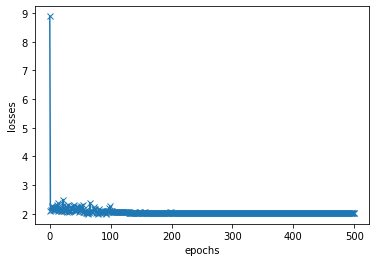

In [51]:
val_loss = [result] + history1 + history2 + history3 + history4 + history5
print(val_loss)
val_loss_list = [vl['val_loss'] for vl in val_loss]

plt.plot(val_loss_list, '-x')

plt.xlabel('epochs')
plt.ylabel('losses')

In [52]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(inputs)
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)

In [53]:
input, target = val_ds[0]
predict_single(input, target, model)

Input: tensor([13.0000,  5.2500,  2.0000,  0.0000,  1.0000,  1.0000])
Target: tensor([5.7000])
Prediction: tensor([7.6499])


In [54]:
input, target = val_ds[10]
predict_single(input, target, model)

Input: tensor([7.0000, 0.3100, 2.0000, 1.0000, 1.0000, 0.0000])
Target: tensor([1.0500])
Prediction: tensor([1.2935])


In [55]:
input, target = val_ds[23]
predict_single(input, target, model)

Input: tensor([13.0000,  7.7500,  1.0000,  0.0000,  1.0000,  0.0000])
Target: tensor([10.7900])
Prediction: tensor([10.6543])


# Decision Tree
Decision tree atau pohon keputusan adalah salah satu algoritma supervised learning yang dapat dipakai untuk masalah klasifikasi dan regresi. Decision tree merupakan algoritma yang powerful alias mampu dipakai dalam masalah yang kompleks. Decision tree juga merupakan komponen pembangun utama algoritma Random Forest, yang merupakan salah satu algoritma paling powerful saat ini.

Decision tree memprediksi sebuah kelas (klasifikasi) atau nilai (regresi) berdasarkan aturan-aturan yang dibentuk setelah mempelajari data.

Misalnya kita memiliki data seperti di bawah. Data berisi informasi mengenai kondisi cuaca pada hari tertentu dan apakah cocok untuk bermain golf di kondisi cuaca tersebut.\

# Dataset
Iris


In [2]:
import pandas as pd
from sklearn.datasets import load_iris
 
# Membaca file IRIS.csv
iris = pd.read_csv('/content/IRIS.csv')

In [3]:
display(iris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# memisahkan atribut dan label
X = iris[['sepal_length',	'sepal_width',	'petal_length'	,'petal_width']]
y = iris['species']

In [5]:
from sklearn.tree import DecisionTreeClassifier
 
# membuat model Decision Tree
tree_model = DecisionTreeClassifier() 
 
# melakukan pelatihan model terhadap data
tree_model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [6]:
# prediksi model dengan tree_model.predict([[SepalLength, SepalWidth, PetalLength, PetalWidth]])
tree_model.predict([[6.2, 3.4, 5.4, 2.3]])

array(['Iris-virginica'], dtype=object)

In [7]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True
)

In [8]:
#Konversi .dot file to png
#https://onlineconvertfree.com/converter/images/

# Logistic Regression
Logistic Regression adalah sebuah algoritma klasifikasi untuk mencari hubungan antara fitur (input) diskrit/kontinu dengan probabilitas hasil output diskrit tertentu.

# Dataset
https://www.kaggle.com/dragonheir/logistic-regression

In [56]:
import pandas as pd
 
# membaca dataset dan mengubahnya menjadi dataframe
data = pd.read_csv('/content/Social_Network_Ads.csv')

In [57]:
display(data)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [61]:
# drop kolom yang tidak diperlukan
data = data.drop(columns=['User ID'])
 
# jalankan proses one-hot encoding dengan pd.get_dummies()
data = pd.get_dummies(data)
data

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [62]:
# pisahkan atribut dan label
predictions = ['Age' , 'EstimatedSalary' , 'Gender_Female' , 'Gender_Male']
X = data[predictions]
y = data['Purchased'] 

In [63]:
# lakukan normalisasi terhadap data yang kita miliki
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data = pd.DataFrame(scaled_data, columns= X.columns)
scaled_data.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,-1.781797,-1.490046,-1.020204,1.020204
1,-0.253587,-1.460681,-1.020204,1.020204
2,-1.113206,-0.785290,0.980196,-0.980196
3,-1.017692,-0.374182,0.980196,-0.980196
4,-1.781797,0.183751,-1.020204,1.020204


In [64]:
from sklearn.model_selection import train_test_split
 
# bagi data menjadi train dan test untuk setiap atribut dan label
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=1)

In [65]:
from sklearn import linear_model
 
# latih model dengan fungsi fit
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
from sklearn.preprocessing import StandardScaler
 
# uji akurasi model
model.score(X_test, y_test)

0.825

# SVM

Apa itu SVM?

Support Vector Machine adalah model ML multifungsi yang dapat digunakan untuk menyelesaikan permasalahan klasifikasi, regresi, dan pendeteksian outlier. Termasuk ke dalam kategori supervised learning, SVM adalah salah satu metode yang paling populer dalam machine learning. Siapa pun yang tertarik untuk masuk ke dalam dunia ML, perlu mengetahui SVM.

# Dataset
https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [67]:
#Import Libraries
import pandas as pd
df = pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [68]:
# memisahkan atribut pada dataset dan menyimpannya pada sebuah variabel
X = df[df.columns[:8]]
 
# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = df['Outcome']

In [69]:
# memisahkan atribut pada dataset dan menyimpannya pada sebuah variabel
X = df[df.columns[:8]]
 
# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = df['Outcome']

In [70]:
from sklearn.model_selection import train_test_split
 
# memisahkan data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [71]:
from sklearn.svm import SVC
 
# membuat objek SVC dan memanggil fungsi fit untuk melatih model
clf = SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [72]:
# Menampilkan skor akurasi prediksi
clf.score(X_test, y_test)

0.7440944881889764

# Random Forest

Random forest adalah metode pembelajaran ensemble untuk klasifikasi, regresi dan tugas-tugas lain yang beroperasi dengan membangun banyak pohon keputusan pada waktu pelatihan. Untuk tugas klasifikasi, output dari hutan acak adalah kelas yang dipilih oleh sebagian besar pohon. Untuk tugas regresi, prediksi rata-rata atau rata-rata dari masing-masing pohon dikembalikan. Hutan keputusan acak benar untuk kebiasaan pohon keputusan yang terlalu pas dengan set pelatihan mereka. Hutan acak umumnya mengungguli pohon keputusan, tetapi akurasinya lebih rendah daripada pohon yang didorong gradien. Namun, karakteristik data dapat memengaruhi kinerjanya.

#Example

Prediksi kandidat mana yang dapat diterima ke universitas bergengsi

ada 3 kemungkinan yang terjadi

kandidat tak diterima direpresentasikan dengan nilai 0

kandidat masih dalam daftar tunggu penerimaan direpresentasikan dengan nilai 1

kandidat diterima direpresentasikan dengan nilai 2

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [74]:
import pandas as pd

candidates = {'gmat': [780,750,690,710,780,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,760,640,620,660,660,680,650,670,580,590,790],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'age': [25,28,24,27,26,31,24,25,28,23,25,27,30,28,26,23,29,31,26,26,25,24,28,23,25,29,28,26,30,30,23,24,27,29,28,22,23,24,28,31],
              'admitted': [2,2,1,2,2,2,0,2,2,0,0,2,2,1,2,0,0,1,0,0,1,0,0,0,0,1,1,0,1,2,0,0,1,1,1,0,0,0,0,2]
              }

df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','age','admitted'])
print (df)

    gmat  gpa  work_experience  age  admitted
0    780  4.0                3   25         2
1    750  3.9                4   28         2
2    690  3.3                3   24         1
3    710  3.7                5   27         2
4    780  3.9                4   26         2
5    730  3.7                6   31         2
6    690  2.3                1   24         0
7    720  3.3                4   25         2
8    740  3.3                5   28         2
9    690  1.7                1   23         0
10   610  2.7                3   25         0
11   690  3.7                5   27         2
12   710  3.7                6   30         2
13   680  3.3                4   28         1
14   770  3.3                3   26         2
15   610  3.0                1   23         0
16   580  2.7                4   29         0
17   650  3.7                6   31         1
18   540  2.7                2   26         0
19   590  2.3                3   26         0
20   620  3.3                2   2

In [91]:
df = df.replace({'admitted': 2}, 'Diterima')
df = df.replace({'admitted': 1}, 'Mohon menunggu')
df = df.replace({'admitted': 0}, 'Ditolak')

In [92]:
X = df[['gmat', 'gpa','work_experience','age']]
y = df['admitted']

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [94]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

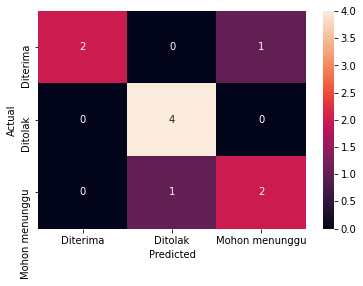

In [95]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [96]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.8


In [97]:
prediction = clf.predict([[730,3.7,4,27]]) 
print ('Predicted Result: ', prediction)

Predicted Result:  ['Diterima']
